In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mnist_keras import MnistKeras
from PIL import Image
import pickle
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import logging
tf.get_logger().setLevel('ERROR')

In [14]:
from mnist_keras import MnistKeras
(x_train, y_train), (_,_) = MnistKeras.load_data() #importing the load data from MnistKeras class
model = MnistKeras.build_model()
model = MnistKeras.train(model, "Model_Sai_Shanmukh_Varma_Rudraraju") # Saving the model

Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8802
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.9416
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9551
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9638
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9694
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9746
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9780
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9811
Epoch 9/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9835
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.9856

In [2]:
(_,_), (x_test, y_test) = MnistKeras.load_data() #importing the load data from MnistKeras class
model = MnistKeras.load("Model_Sai_Shanmukh_Varma_Rudraraju") # Loading the trained model
MnistKeras.test(model)


Test Loss: 0.08161499351263046
Test Accuracy: 0.9771999716758728


In [3]:
def shape_image(images):
    my_image_reshaped = images.reshape(-1)  
    my_image_normalized = my_image_reshaped / 255.0
    return my_image_normalized

def size_image(path):
    try:
        with Image.open(path) as image:
            my_image_grayscaled = image.convert("L")  
            my_image_resized= my_image_grayscaled.resize((28, 28))
            return np.array(my_image_resized)
    except Exception as e:
        print("Not able to process the image: {}".format(e))
        return None


In [4]:
(_,_), (x_test, y_test) = MnistKeras.load_data() # Loading the trained model
trained_model = MnistKeras.load("Model_Sai_Shanmukh_Varma_Rudraraju")

In [5]:
my_image_folder = 'Test_Images' # Path of the folder containing hand written images
test_images = []
true_labels = []
for label in range(10):  # My labels are from 0 to 9
    for i in range(1, 6):  # I have 5 images per label
        image_name = "{}_{}.png".format(label,i)
        file_path = os.path.join(my_image_folder, image_name)
        my_image = size_image(file_path)
        if my_image is not True:
            test_images.append(shape_image(my_image))
            true_labels.append(label)
test_images = np.array(test_images)
true_labels = np.array(true_labels)

In [6]:
predict_images = trained_model.predict(test_images)
predict_labels = np.argmax(predict_images, axis=1)

prediction_incorrect = np.where(predict_labels != true_labels)[0]

2/2 [==============================] - 0s 16ms/step


In [7]:
# Shuffle 12 incorrect predictions for first time
incorrect_sample_indices = shuffle(prediction_incorrect, random_state=8)[:12]
incorrect_images = test_images[incorrect_sample_indices]
incorrect_true_labels = true_labels[incorrect_sample_indices]
incorrect_pred_labels = predict_labels[incorrect_sample_indices]

In [8]:
# Plotting incorrect images
def plot_predict_incorrect(images, true_labels, pred_labels):
    plt.figure(figsize=(14,8))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray') 
        plt.title(f"True Label of Image : {true_labels[i]}, Predicted Lable of Image: {pred_labels[i]}",fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

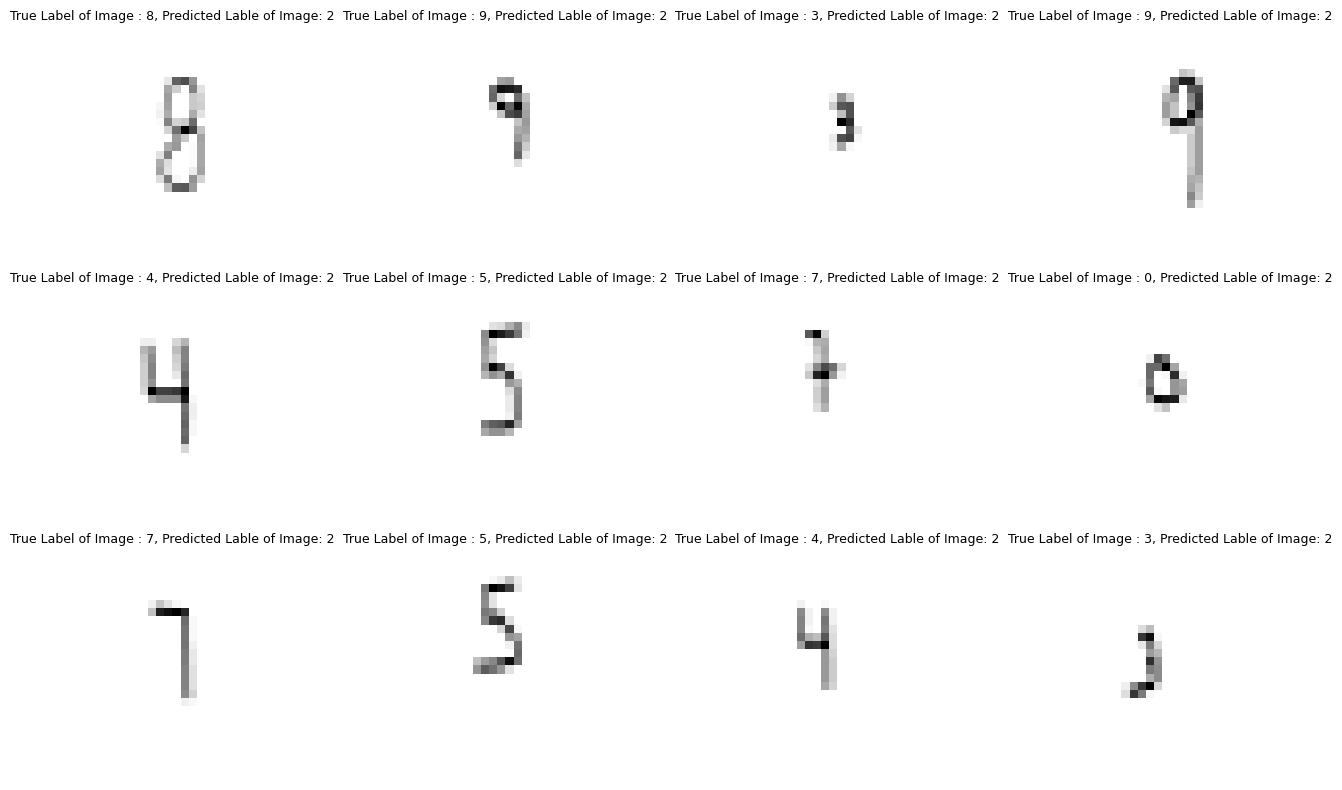

In [9]:
# Plotting incorrect images for first time
plot_predict_incorrect(incorrect_images, incorrect_true_labels, incorrect_pred_labels)

In [10]:
# Shuffle 12 incorrect predictions for second time with different combination
incorrect_sample_indices = shuffle(prediction_incorrect, random_state=40)[:12]
incorrect_images = test_images[incorrect_sample_indices]
incorrect_true_labels = true_labels[incorrect_sample_indices]
incorrect_pred_labels = predict_labels[incorrect_sample_indices]


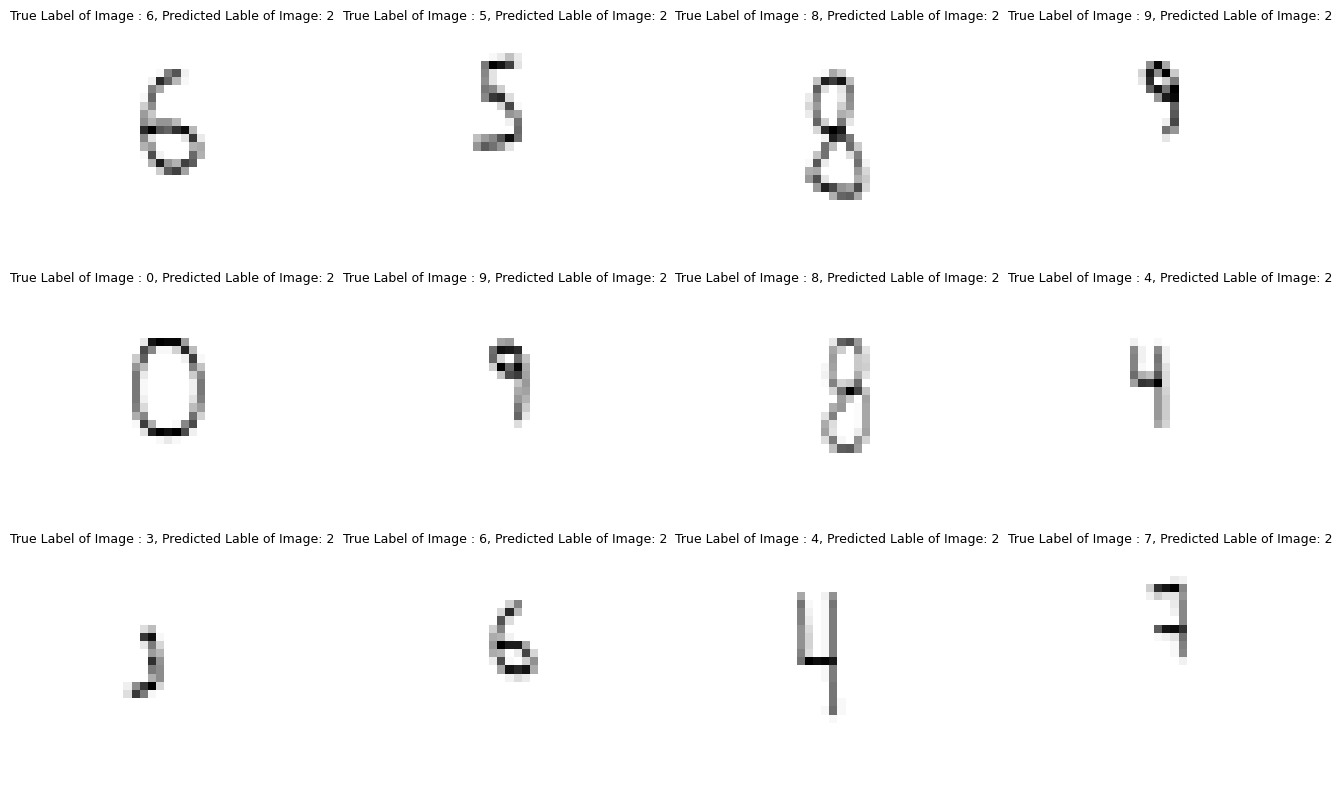

In [11]:
# Plotting incorrect images for second time with different combination
plot_predict_incorrect(incorrect_images, incorrect_true_labels, incorrect_pred_labels)